Multi-attribute utility model by Hossein Basereh Taramsari

| Option No. | Description |
|------------|-------------|
| 1 | Designing sustainable products by changing design parameters such as materials, manufacturing processes. |
| 2 | Increasing the number of women in company’s board to create equal gender balance. |
| 3 | Increase the production of the company by 50%. |
| 4 | Investing in R&D to improve the quality of the products. |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import triang

In [2]:
# Consequence Table
data = {"Objectives": ["Maximizing Profit", "Minimizing Environmental Impacts", "Minimizing Environmental Impacts","Minimizing Environmental Impacts", "Maximizing Diversity and Equity", "Maximizing Sales","Maximizing Sales", "Maximizing Sales"],
    "Attributes": ["Profit", "CO2 Emissions Reduction", "CO2 Emissions Reduction", "CO2 Emissions Reduction","Gender Balance Ratio", "Brand Image", "Brand Image", "Brand Image"],
    "Units": ["USD (Millions)", "%", "%", "%", "Female/Male", "No. of Satisfied Customers","No. of Satisfied Customers", "No. of Satisfied Customers"],
    "Statistics": ["", "Min", "Mode", "Max", "", "Min", "Mode", "Max"],
    "Option 1": [2, 20, 30, 40, 0.125, 150, 180, 200],
    "Option 2": [1.5, 0, 5, 10, 1, 100, 130, 150],
    "Option 3": [3, 0, -10, -20, 0.125, 50, 80, 100],
    "Option 4": [2, 10, 20, 30, 0.125, 150, 165, 180]}

df = pd.DataFrame(data)
df

,Objectives,Attributes,Units,Statistics,Option 1,Option 2,Option 3,Option 4
0,Maximizing Profit,Profit,USD (Millions),,2.000,1.5,3.000,2.000
1,Minimizing Environmental Impacts,CO2 Emissions Reduction,%,Min,20.000,0.0,0.000,10.000
2,Minimizing Environmental Impacts,CO2 Emissions Reduction,%,Mode,30.000,5.0,-10.000,20.000
3,Minimizing Environmental Impacts,CO2 Emissions Reduction,%,Max,40.000,10.0,-20.000,30.000
4,Maximizing Diversity and Equity,Gender Balance Ratio,Female/Male,,0.125,1.0,0.125,0.125
5,Maximizing Sales,Brand Image,No. of Satisfied Customers,Min,150.000,100.0,50.000,150.000
6,Maximizing Sales,Brand Image,No. of Satisfied Customers,Mode,180.000,130.0,80.000,165.000
7,Maximizing Sales,Brand Image,No. of Satisfied Customers,Max,200.000,150.0,100.000,180.000


## Identification of Utility Function using CE Method

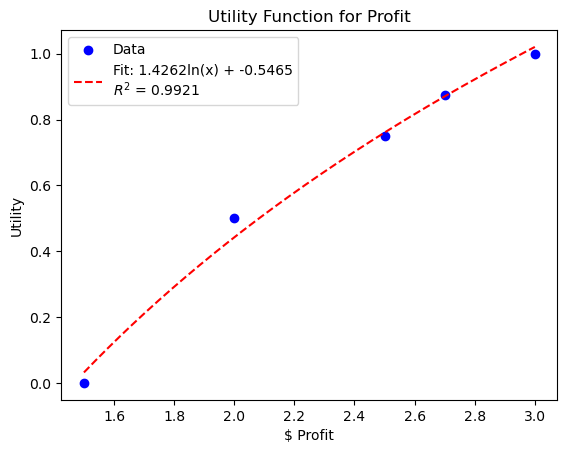

Parameters: a = 1.4262, b = -0.5465
R-squared: 0.9921


'1.4262*ln(x) + -0.5465'

In [3]:
# Profit
profits = np.array([1.5, 2, 2.5, 2.7, 3])
utilities = np.array([0, 0.5, 0.75, 0.875, 1])

# utility function (logarithmic function)
def utp(x, a, b):
    return a * np.log(x) + b

params, covariance = curve_fit(utp, profits, utilities)
a, b = params
residuals = utilities - utp(profits, a, b)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((utilities - np.mean(utilities))**2)
r_squared = 1 - (ss_res / ss_tot)

x_values = np.linspace(min(profits), max(profits), 500)
y_values = utp(x_values, a, b)

plt.scatter(profits, utilities, label='Data', color='blue')
plt.plot(x_values, y_values, label=f'Fit: {a:.4f}ln(x) + {b:.4f}\n$R^2$ = {r_squared:.4f}', color='red', linestyle='--')
plt.xlabel('$ Profit')
plt.ylabel('Utility')
plt.title('Utility Function for Profit')
plt.legend()
plt.show()

profit_utility = f'{a:.4f}*ln(x) + {b:.4f}'

print(f'Parameters: a = {a:.4f}, b = {b:.4f}')
print(f'R-squared: {r_squared:.4f}')
profit_utility


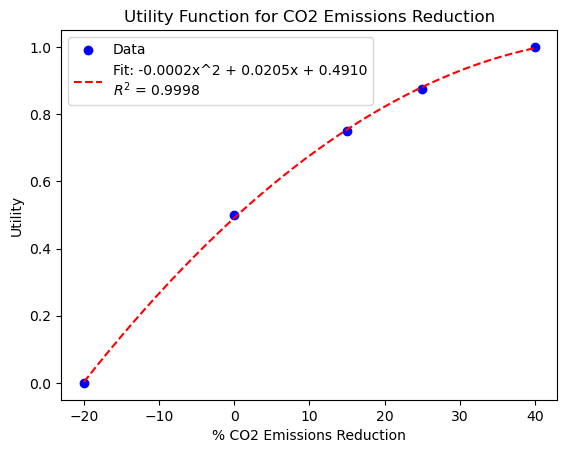

Parameters: a_e = -0.0002, b_e = 0.0205, c_e = 0.4910
R-squared: 0.9998


'-0.0002*x^2 + 0.0205*x + 0.4910'

In [4]:
# CO2 Emissions Reduction
emissions_reduction = np.array([-20, 0, 15, 25, 40])
utilities_emissions = np.array([0, 0.5, 0.75, 0.875, 1])

# utility function (quadratic function)
def uter(x, a, b, c):
    return a * x**2 + b * x + c


params_emissions, covariance_emissions = curve_fit(uter, emissions_reduction, utilities_emissions)
a_e, b_e, c_e = params_emissions

residuals_emissions = utilities_emissions - uter(emissions_reduction, a_e, b_e, c_e)
ss_res_emissions = np.sum(residuals_emissions**2)
ss_tot_emissions = np.sum((utilities_emissions - np.mean(utilities_emissions))**2)
r_squared_emissions = 1 - (ss_res_emissions / ss_tot_emissions)

x_values_emissions = np.linspace(min(emissions_reduction), max(emissions_reduction), 500)
y_values_emissions = uter(x_values_emissions, a_e, b_e, c_e)

plt.scatter(emissions_reduction, utilities_emissions, label='Data', color='blue')
plt.plot(x_values_emissions, y_values_emissions, label=f'Fit: {a_e:.4f}x^2 + {b_e:.4f}x + {c_e:.4f}\n$R^2$ = {r_squared_emissions:.4f}', color='red', linestyle='--')
plt.xlabel('% CO2 Emissions Reduction')
plt.ylabel('Utility')
plt.title('Utility Function for CO2 Emissions Reduction')
plt.legend()
plt.show()

er_utility = f'{a_e:.4f}*x^2 + {b_e:.4f}*x + {c_e:.4f}'

print(f'Parameters: a_e = {a_e:.4f}, b_e = {b_e:.4f}, c_e = {c_e:.4f}')
print(f'R-squared: {r_squared_emissions:.4f}')
er_utility


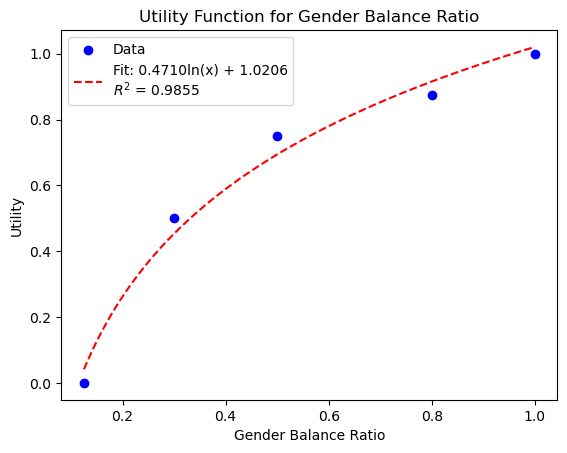

Parameters: a_g = 0.4710, b_g = 1.0206
R-squared: 0.9855


'0.4710*ln(x) + 1.0206'

In [5]:
# Gender Balance
gb = np.array([0.125, 0.3, 0.5, 0.8, 1])
utilities_gender = np.array([0, 0.5, 0.75, 0.875, 1])

# utility function (logarithmic function)
def utgb(x, a, b):
    return a * np.log(x) + b

params_gender, covariance_gender = curve_fit(utgb, gb, utilities_gender)
a_g, b_g = params_gender
residuals_gender = utilities_gender - utgb(gb, a_g, b_g)
ss_res_gender = np.sum(residuals_gender**2)
ss_tot_gender = np.sum((utilities_gender - np.mean(utilities_gender))**2)
r_squared_gender = 1 - (ss_res_gender / ss_tot_gender)

x_values_gender = np.linspace(min(gb), max(gb), 500)
y_values_gender = utgb(x_values_gender, a_g, b_g)

plt.scatter(gb, utilities_gender, label='Data', color='blue')
plt.plot(x_values_gender, y_values_gender, label=f'Fit: {a_g:.4f}ln(x) + {b_g:.4f}\n$R^2$ = {r_squared_gender:.4f}', color='red', linestyle='--')
plt.xlabel('Gender Balance Ratio')
plt.ylabel('Utility')
plt.title('Utility Function for Gender Balance Ratio')
plt.legend()
plt.show()

gb_utility = f'{a_g:.4f}*ln(x) + {b_g:.4f}'

print(f'Parameters: a_g = {a_g:.4f}, b_g = {b_g:.4f}')
print(f'R-squared: {r_squared_gender:.4f}')
gb_utility

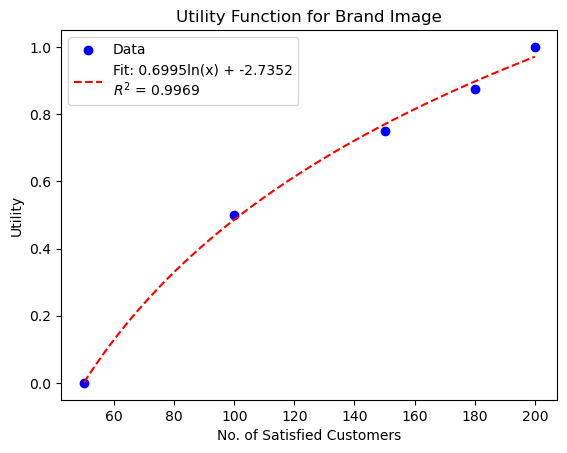

Parameters: a_b = 0.6995, b_b = -2.7352
R-squared: 0.9969


'0.6995*ln(x) + -2.7352'

In [6]:
# Brand Image
satisfied_customers = np.array([50, 100, 150, 180, 200])
utilities_brand = np.array([0, 0.5, 0.75, 0.875, 1])

# utility function (logarithmic function)
def utbi(x, a, b):
    return a * np.log(x) + b

params_brand, covariance_brand = curve_fit(utbi, satisfied_customers, utilities_brand)
a_b, b_b = params_brand
residuals_brand = utilities_brand - utbi(satisfied_customers, a_b, b_b)
ss_res_brand = np.sum(residuals_brand**2)
ss_tot_brand = np.sum((utilities_brand - np.mean(utilities_brand))**2)
r_squared_brand = 1 - (ss_res_brand / ss_tot_brand)

x_values_brand = np.linspace(min(satisfied_customers), max(satisfied_customers), 500)
y_values_brand = utbi(x_values_brand, a_b, b_b)

plt.scatter(satisfied_customers, utilities_brand, label='Data', color='blue')
plt.plot(x_values_brand, y_values_brand, label=f'Fit: {a_b:.4f}ln(x) + {b_b:.4f}\n$R^2$ = {r_squared_brand:.4f}', color='red', linestyle='--')
plt.xlabel('No. of Satisfied Customers')
plt.ylabel('Utility')
plt.title('Utility Function for Brand Image')
plt.legend()
plt.show()

bi_utility = f'{a_b:.4f}*ln(x) + {b_b:.4f}'

print(f'Parameters: a_b = {a_b:.4f}, b_b = {b_b:.4f}')
print(f'R-squared: {r_squared_brand:.4f}')
bi_utility

## Finding the weight of each attribute using swing weight method

In [7]:
swing_data = {"Attribute": ["Benchmark", "Profit", "Emissions Reduction", "Gender Balance Ratio", "Brand Image"],
    "Consequence": ["1.5$ - -20% - 0.125 - 50", "3$ - -20% - 0.125 - 50", "1.5$ - 40% - 0.125 - 50", "1.5$ - -20% - 1 - 50", "1.5$ - -20% - 0.125 - 200"],
    "Rank": [5, 4, 1, 3, 2],
    "Rate": [0, 20, 100, 50, 75],}

swing_df = pd.DataFrame(swing_data)

total_rate = swing_df["Rate"].sum()
swing_df["Weight"] = swing_df["Rate"] / total_rate
swing_df['Weight'] = swing_df['Weight'].astype(float).round(3)
swing_df

,Attribute,Consequence,Rank,Rate,Weight
0,Benchmark,1.5$ - -20% - 0.125 - 50,5,0,0.000
1,Profit,3$ - -20% - 0.125 - 50,4,20,0.082
2,Emissions Reduction,1.5$ - 40% - 0.125 - 50,1,100,0.408
3,Gender Balance Ratio,1.5$ - -20% - 1 - 50,3,50,0.204
4,Brand Image,1.5$ - -20% - 0.125 - 200,2,75,0.306


In [8]:
weight_profit = swing_df.loc[swing_df['Attribute'] == "Profit", "Weight"].values[0]
weight_emissions = swing_df.loc[swing_df['Attribute'] == "Emissions Reduction", "Weight"].values[0]
weight_gender = swing_df.loc[swing_df['Attribute'] == "Gender Balance Ratio", "Weight"].values[0]
weight_brand = swing_df.loc[swing_df['Attribute'] == "Brand Image", "Weight"].values[0]

attributes = pd.DataFrame({
    "Attribute": ["Profit", "Emissions Reduction", "Gender Balance Ratio", "Brand Image"],
    "Utility Function": [profit_utility, er_utility, gb_utility, bi_utility],
    "Weight": [weight_profit, weight_emissions, weight_gender, weight_brand]
})

# Print the table
attributes

,Attribute,Utility Function,Weight
0,Profit,1.4262*ln(x) + -0.5465,0.082
1,Emissions Reduction,-0.0002*x^2 + 0.0205*x + 0.4910,0.408
2,Gender Balance Ratio,0.4710*ln(x) + 1.0206,0.204
3,Brand Image,0.6995*ln(x) + -2.7352,0.306


## Monte Carlo Simulations

In [9]:
weights = {"Profit": 0.082,  "Emissions Reduction": 0.408,  "Gender Balance Ratio": 0.204, "Brand Image": 0.306}

def utility_profit(x):
    return 1.4262 * np.log(x) - 0.5465

def utility_emissions(x):
    return -0.0002 * x**2 + 0.0205 * x + 0.4910

def utility_gender(x):
    return 0.4710 * np.log(x) + 1.0206

def utility_brand(x):
    return 0.6995 * np.log(x) - 2.7352

## Option 1

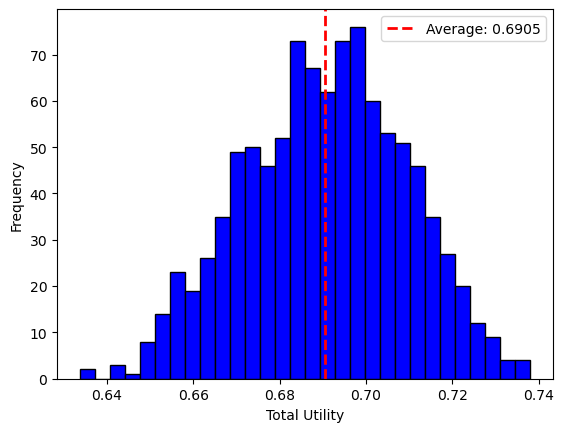

0.6904868647294853

In [10]:
num_samples = 1000
total_utilities_option_1 = np.zeros(num_samples)
option_1 = df['Option 1'].values



for i in range(num_samples):
    emissions_values = option_1[1:4]  
    emissions_sample = np.random.triangular(emissions_values[0], emissions_values[1], emissions_values[2])
    total_utilities_option_1[i] += weights["Emissions Reduction"] * utility_emissions(emissions_sample) 

    brand_values = option_1[5:8] 
    brand_sample = np.random.triangular(brand_values[0], brand_values[1], brand_values[2])
    total_utilities_option_1[i] += weights["Brand Image"] * utility_brand(brand_sample)

profit_utility_val_1 = utility_profit(option_1[0])
gender_balance_utility_val_1 = utility_gender(option_1[4])
total_utilities_option_1 += weights["Profit"] * profit_utility_val_1
total_utilities_option_1 += weights["Gender Balance Ratio"] * gender_balance_utility_val_1

option_1 = np.mean(total_utilities_option_1)

plt.hist(total_utilities_option_1, bins=30, color='blue', edgecolor='black')
plt.xlabel('Total Utility')
plt.ylabel('Frequency')
plt.axvline(option_1, color='red', linestyle='dashed', linewidth=2, label=f'Average: {option_1:.4f}')
plt.legend()
plt.show()

option_1


## Option 2

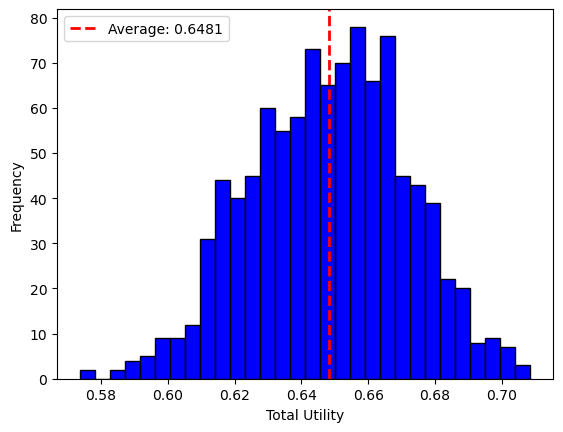

0.6481209222778691

In [11]:
num_samples = 1000
total_utilities_option_2 = np.zeros(num_samples)
option_2 = df['Option 2'].values

for i in range(num_samples):
    emissions_values = option_2[1:4]  
    emissions_sample = np.random.triangular(emissions_values[0], emissions_values[1], emissions_values[2])
    total_utilities_option_2[i] += weights["Emissions Reduction"] * utility_emissions(emissions_sample)

    brand_values = option_2[5:8] 
    brand_sample = np.random.triangular(brand_values[0], brand_values[1], brand_values[2])
    total_utilities_option_2[i] += weights["Brand Image"] * utility_brand(brand_sample)

profit_utility_val_2 = utility_profit(option_2[0])
gender_balance_utility_val_2 = utility_gender(option_2[4])
total_utilities_option_2 += weights["Profit"] * profit_utility_val_2
total_utilities_option_2 += weights["Gender Balance Ratio"] * gender_balance_utility_val_2

option_2 = np.mean(total_utilities_option_2)

plt.hist(total_utilities_option_2, bins=30, color='blue', edgecolor='black')
plt.xlabel('Total Utility')
plt.ylabel('Frequency')
plt.axvline(option_2, color='red', linestyle='dashed', linewidth=2, label=f'Average: {option_2:.4f}')
plt.legend()
plt.show()

option_2


## Option 3

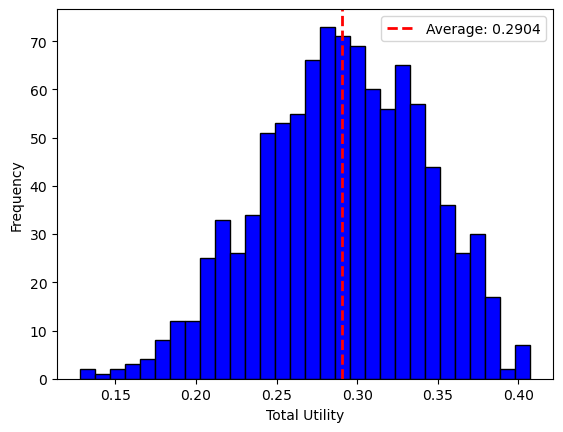

0.29038938251320984

In [12]:
num_samples = 1000
total_utilities_option_3 = np.zeros(num_samples)
option_3 = df['Option 3'].values

for i in range(num_samples):
    emissions_values = [min(option_3[1:4]), np.median(option_3[1:4]), max(option_3[1:4])] 
    emissions_sample = np.random.triangular(*emissions_values)
    total_utilities_option_3[i] += weights["Emissions Reduction"] * utility_emissions(emissions_sample)

    brand_values = option_3[5:8] 
    brand_sample = np.random.triangular(brand_values[0], brand_values[1], brand_values[2])
    total_utilities_option_3[i] += weights["Brand Image"] * utility_brand(brand_sample)


profit_utility_val_3 = utility_profit(option_3[0])
gender_balance_utility_val_3 = utility_gender(option_3[4])
total_utilities_option_3 += weights["Profit"] * profit_utility_val_3
total_utilities_option_3 += weights["Gender Balance Ratio"] * gender_balance_utility_val_3

option_3 = np.mean(total_utilities_option_3)

plt.hist(total_utilities_option_3, bins=30, color='blue', edgecolor='black')
plt.xlabel('Total Utility')
plt.ylabel('Frequency')
plt.axvline(option_3, color='red', linestyle='dashed', linewidth=2, label=f'Average: {option_3:.4f}')
plt.legend()
plt.show()

option_3


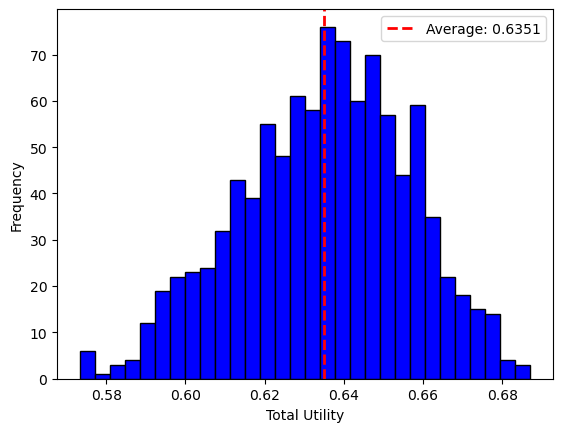

0.6350629601737733

In [13]:
num_samples = 1000
total_utilities_option_4 = np.zeros(num_samples)
option_4 = df['Option 4'].values

for i in range(num_samples):
    emissions_values = option_4[1:4]  
    emissions_sample = np.random.triangular(emissions_values[0], emissions_values[1], emissions_values[2])
    total_utilities_option_4[i] += weights["Emissions Reduction"] * utility_emissions(emissions_sample)
    brand_values = option_4[5:8]  
    brand_sample = np.random.triangular(brand_values[0], brand_values[1], brand_values[2])
    total_utilities_option_4[i] += weights["Brand Image"] * utility_brand(brand_sample)

profit_utility_val_4 = utility_profit(option_4[0])
gender_balance_utility_val_4 = utility_gender(option_4[4])
total_utilities_option_4 += weights["Profit"] * profit_utility_val_4
total_utilities_option_4 += weights["Gender Balance Ratio"] * gender_balance_utility_val_4

option_4 = np.mean(total_utilities_option_4)

plt.hist(total_utilities_option_4, bins=30, color='blue', edgecolor='black')
plt.xlabel('Total Utility')
plt.ylabel('Frequency')
plt.axvline(option_4, color='red', linestyle='dashed', linewidth=2, label=f'Average: {option_4:.4f}')
plt.legend()
plt.show()

option_4


## Finding the best option

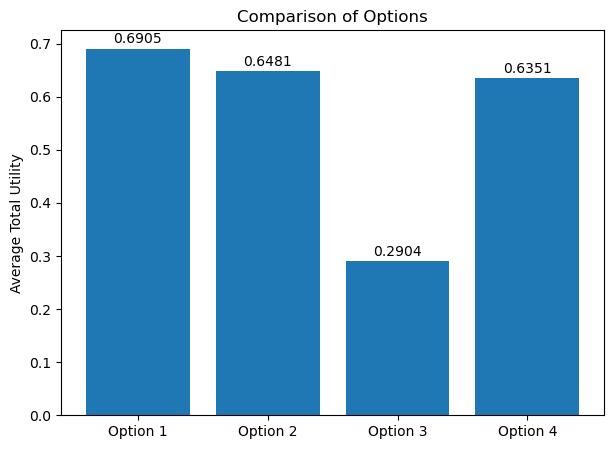

In [14]:
average_total_utilities = { "Option 1": option_1, "Option 2": option_2, "Option 3": option_3,"Option 4": option_4,}

options = list(average_total_utilities.keys())
average_utilities = list(average_total_utilities.values())
plt.figure(figsize=(7, 5))
plt.bar(options, average_utilities)
plt.ylabel('Average Total Utility')
plt.title('Comparison of Options')
plt.xticks(options)
for i, value in enumerate(average_utilities):
    plt.text(i, value + 0.01, f'{value:.4f}', ha='center')
plt.show()

## Sensitivity Analysis

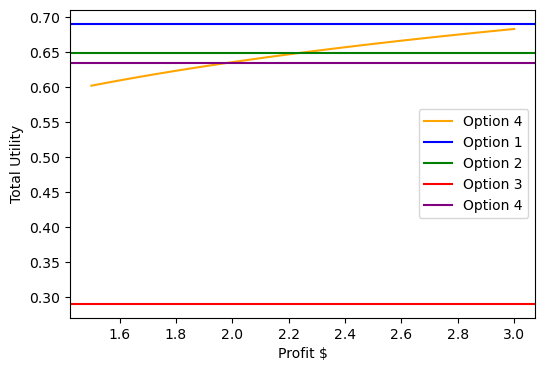

In [20]:
# Sensitivity Analysis of Profit for Option 4
emissions_option_4 = np.median([10, 20, 30]) 
gender_balance_option_4 = 0.125  
brand_image_option_4 = np.median([150, 165, 180]) 

new_profit_values = np.linspace(1.5, 3, num=100)
utilities_option_4_varying_profit = [
    weights["Profit"] * utility_profit(profit) +
    weights["Emissions Reduction"] * utility_emissions(emissions_option_4) +
    weights["Gender Balance Ratio"] * utility_gender(gender_balance_option_4) +
    weights["Brand Image"] * utility_brand(brand_image_option_4)
    for profit in new_profit_values]

plt.figure(figsize=(6, 4))
plt.plot(new_profit_values, utilities_option_4_varying_profit, label='Option 4', color='orange')
colors = ['blue', 'green', 'red', 'purple']
for (option, utility), color in zip(average_total_utilities.items(), colors):
    plt.axhline(y=utility, label=option, color=color)
plt.xlabel('Profit $')
plt.ylabel('Total Utility')
plt.legend()
plt.show()

The graph above shows that if the profit of option 4 increases to 3 million dollars, it is very close to option 1 and it could be indifference between these options.